C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


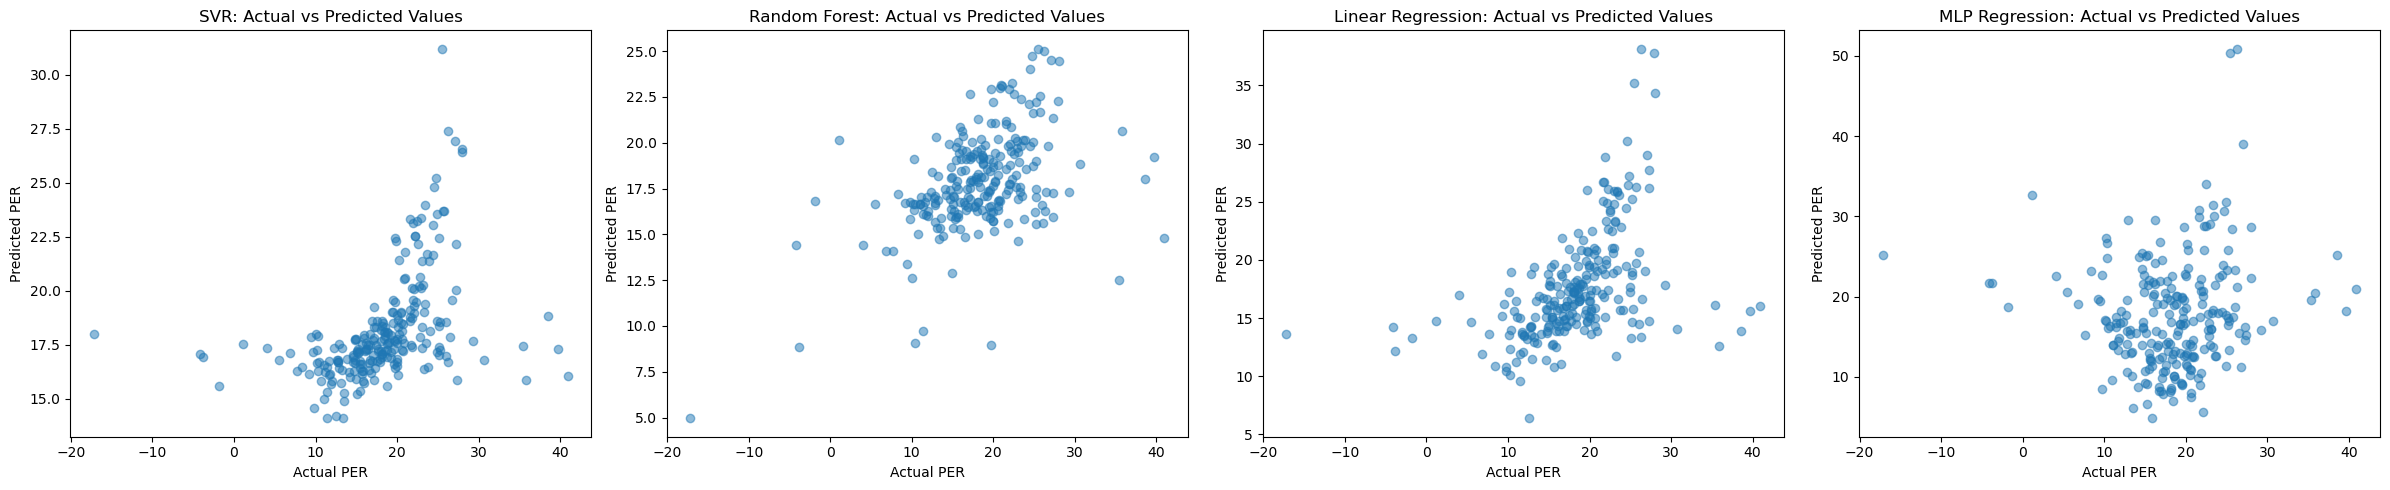

Support Vector Regression:
Mean Squared Error: 35.549675987113694
R-squared: 0.18350134803912255

Random Forest Regression:
Mean Squared Error: 34.387309180208014
R-squared: 0.2101983826693843

Linear Regression:
Mean Squared Error: 38.13169565258916
R-squared: 0.12419797838361879

MLP Regression:
Mean Squared Error: 82.11543802521403
R-squared: -0.8860128142115264
Classification Report for SVR:
              precision    recall  f1-score   support

        High       0.83      0.18      0.29        28
         Low       0.46      0.98      0.63        92
    Moderate       0.78      0.41      0.54        61
    Very Low       1.00      0.10      0.19        58

    accuracy                           0.53       239
   macro avg       0.77      0.42      0.41       239
weighted avg       0.72      0.53      0.46       239

Classification Report for Random Forest:
              precision    recall  f1-score   support

        High       1.00      0.07      0.13        28
         Low    

In [25]:
#### Place file : FinalData.csv LocalPath 


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\ThinkPad\Documents\Group18\FinalData.csv", encoding='latin1')
df.columns = ['Player', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
       'PER', 'Draft pick', 'Height (No Shoes)', 'Height (With Shoes)',
       'Wingspan', 'Standing reach', 'Vertical (Max)', 'Vertical (Max Reach)',
       'Vertical (No Step)', 'Vertical (No Step Reach)', 'Weight', 'Body Fat',
       'Hand (Length)', 'Hand (Width)', 'Bench', 'Agility', 'Sprint']

# Select the target column 'PER'
y = df['PER']

# Impute missing values in 'PER' with mean separately for training and test sets
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Select features excluding the non-numeric target and 'Player' columns
x = df.drop(['Player', 'PER', 'Yrs'], axis=1)

# Split the dataset into train and test sets
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.7, random_state=42)

# Impute missing values with mean separately for training and test sets
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Standardize features separately for training and test sets
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

# Build Support Vector Regression (SVR)
svr_regressor = SVR(kernel='sigmoid')  
svr_regressor.fit(x_train_scaled, y_train)
y_svr_predicted = svr_regressor.predict(x_test_scaled)

# Build Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_regressor.fit(x_train_scaled, y_train)
y_rf_predicted = rf_regressor.predict(x_test_scaled)

# Build Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scaled, y_train)
y_linear_predicted = linear_regressor.predict(x_test_scaled)

# Build Neural Network (MLP) Regression
mlp_regressor = MLPRegressor(activation='relu',hidden_layer_sizes=(16, 17, 1), max_iter=250, random_state=42)
mlp_regressor.fit(x_train_scaled, y_train)
y_mlp_predicted = mlp_regressor.predict(x_test_scaled)

# Scatter plots for each algorithm
plt.figure(figsize=(24, 5))

# Support Vector Regression
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_svr_predicted, alpha=0.5)
plt.title('SVR: Actual vs Predicted Values')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')

# Random Forest Regression
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_rf_predicted, alpha=0.5)
plt.title('Random Forest: Actual vs Predicted Values')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')

# Linear Regression
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_linear_predicted, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted Values')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')

# Neural Network (MLP) Regression
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_mlp_predicted, alpha=0.5)
plt.title('MLP Regression: Actual vs Predicted Values')
plt.xlabel('Actual PER')
plt.ylabel('Predicted PER')

plt.tight_layout()
plt.show()

# Evaluate Regression for SVR
mse_svr = mean_squared_error(y_test, y_svr_predicted)
r2_svr = r2_score(y_test, y_svr_predicted)
print("Support Vector Regression:")
print(f'Mean Squared Error: {mse_svr}')
print(f'R-squared: {r2_svr}\n')

# Evaluate Regression for Random Forest
mse_rf = mean_squared_error(y_test, y_rf_predicted)
r2_rf = r2_score(y_test, y_rf_predicted)
print("Random Forest Regression:")
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}\n')

# Evaluate Regression for Linear Regression
mse_linear = mean_squared_error(y_test, y_linear_predicted)
r2_linear = r2_score(y_test, y_linear_predicted)
print("Linear Regression:")
print(f'Mean Squared Error: {mse_linear}')
print(f'R-squared: {r2_linear}\n')

# Evaluate Regression for MLP
mse_mlp = mean_squared_error(y_test, y_mlp_predicted)
r2_mlp = r2_score(y_test, y_mlp_predicted)
print("MLP Regression:")
print(f'Mean Squared Error: {mse_mlp}')
print(f'R-squared: {r2_mlp}')

# Convert predictions to bins
bins = [-np.inf, 15, 20, 25, np.inf]
labels = ['Very Low', 'Low', 'Moderate', 'High']
y_svr_predicted_binned = pd.cut(y_svr_predicted, bins=bins, labels=labels, include_lowest=True)
y_rf_predicted_binned = pd.cut(y_rf_predicted, bins=bins, labels=labels, include_lowest=True)
y_linear_predicted_binned = pd.cut(y_linear_predicted, bins=bins, labels=labels, include_lowest=True)
y_mlp_predicted_binned = pd.cut(y_mlp_predicted, bins=bins, labels=labels, include_lowest=True)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)


# Classification Report for SVR
print("Classification Report for SVR:")
print(classification_report(y_test_binned, y_svr_predicted_binned,zero_division=1))

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test_binned, y_rf_predicted_binned,zero_division=1))

# Classification Report for Linear Regression
print("Classification Report for Linear Regression:")
print(classification_report(y_test_binned, y_linear_predicted_binned,zero_division=1))

# Classification Report for MLP
print("Classification Report for MLP:")
print(classification_report(y_test_binned, y_mlp_predicted_binned,zero_division=1))

